In [3]:
# Searching for high OIII/OII emitters in J-PLUS
# and stacking their GALEX FUV to search for Lyc flux

import numpy as np
import jplus
import get_3dhst as hst
from astropy.io import fits
import elgtools as elg
import MockJPLUS as mtools
import matplotlib.pyplot as plt
import Read_Mocks as read


plotsdir = 'plots/'
suff = 'JAVA'
# Loading J-PLUS data
print 'Loading J-PLUS'
mag_type = 'gpsfMags'
gal_jplus = jplus.datasets.fetch_jplus_objects(mag_type=mag_type, overwrite=False, 
                                                 object_name="jplus_pz", nchunks=20, mag_limit=[16,24.],
                                                extra_where_conds='',db='dr1', allphotoz=True, upperlimparams=True)


#print 'Computing 3FM'
#dm_min = 0.0 # rough number, to be computed as a function using the actual trumpet plots for individual tiles.

gal_jplus['dm_j0660'], gal_jplus['f_j0660'], gal_jplus['fcont_j0660'] = mtools.gen_3fm(gal_jplus['J0660'][:,0],  gal_jplus['rJAVA'][:,0], gal_jplus['gJAVA'][:,0], 
                         Broad_NoLineName='gSDSS')

gal_jplus['err_dm_j0660'] = mtools.gen_3fm_err(gal_jplus['J0660'][:,0], gal_jplus['J0660'][:,1], 
                                         gal_jplus['rJAVA'][:,0], gal_jplus['rJAVA'][:,1], 
                          gal_jplus['gJAVA'][:,0], gal_jplus['gJAVA'][:,1],Broad_NoLineName='gSDSS')

gal_jplus['dm_j0861'], gal_jplus['f_j0861'],gal_jplus['fcont_j0861'] = mtools.gen_3fm(gal_jplus['J0861'][:,0], gal_jplus['z'+suff][:,0], 
                          gal_jplus['i'+suff][:,0],Broad_NoLineName='iSDSS', 
                          LineFilterName='J0861', Broad_LineName='zSDSS')

gal_jplus['err_dm_j0861'] = mtools.gen_3fm_err(gal_jplus['J0861'][:,0], gal_jplus['J0861'][:,1], gal_jplus['z'+suff][:,0], 
                          gal_jplus['z'+suff][:,1],gal_jplus['i'+suff][:,0], gal_jplus['i'+suff][:,1],
                          Broad_NoLineName='iSDSS')



gal_jplus['EW_j0660'] = gal_jplus['f_j0660']/gal_jplus['fcont_j0660']
gal_jplus['EW_j0861'] = gal_jplus['f_j0861']/gal_jplus['fcont_j0861']


#print 'setting redshift ranges of ELGs'
#f_j0660 = jplus.datasets.fetch_jplus_filter('J0660') # Filter transmission curve

#print z_oii, z_ha, z_hb, z_oiii

j-plus [INFO]: Fetching J-PLUS galaxies
j-plus [INFO]:    Loading /home/CEFCA/aaorsi/photoz/jplus_data/jplus_jplus_pz_gpsfMags_dr1_dual_magmax24.0.h5


Loading J-PLUS


(0, 30)

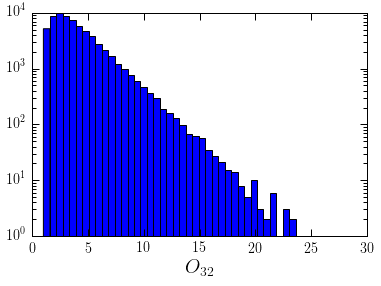

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
EW_min = 40

mask = ((gal_jplus['dm_j0660'] > 0.2) & 
        (gal_jplus['dm_j0861'] > 0.2) &
        (gal_jplus['rJAVA'][:,0] > 20)   &
        (gal_jplus['mask_flags_J0660'] == 0) & # no artifacts is J0660 photometry
        (gal_jplus['mask_flags_J0861'] == 0) & # no artifacts is J0660 photometry
        (gal_jplus['mask_flags_rJAVA'] == 0) &
        (gal_jplus['single_detect_J0660'] != 0) &
        (gal_jplus['single_detect_J0861'] != 0) &# Objects are detected in both rJAVA and J0660
        (1./gal_jplus['J0660'][:,1] > 5) &    # SNR of J0660 is above 5
        (1./gal_jplus['r'+suff][:,1] > 5) &  # SNR of SDSS r-band is above 5
         (1./gal_jplus['J0861'][:,1] > 5)  
         )

cands = jplus.tools.select_object(gal_jplus, mask)

cands['OIII_OII'] = cands['f_j0861']/cands['f_j0660']


plt.hist(cands['OIII_OII'],bins=50, range=[1,30])
plt.yscale('log', nonposy='clip')
#plt.xscale('log', nonposy='clip')

plt.xlabel(r'$O_{32}$',fontsize=20)
plt.xlim([0,30])
